### Naive Bayes Practise

## Irish or Aussie? 
##### To implement train a model that distinguishes between newspaper headlines from an Austrailian newspaper compared to an Irish newspaper

<hr>

#### 1. Downlaoding dataset from source

In [1]:
import urllib.request

print('Beginning file download...')

url = 'https://storage.googleapis.com/kaggle-data-sets/1692/893258/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585170756&Signature=J1IwXsPYMuoLCOsYfbmVo%2Fq1mmpWz1Fx7utvkD4MhwZgvmZMolXHImkLlS0GvbQShD4696vdj4zDySFwgcWzpuRvAJ9ABqBbcgkuvMccihHzHCW4sIP8kF6D%2BoxFYfiz%2Fqcb0Yn85iXAZBDLRsu26kxxNlprEBJEkupvTNg5VUTPy2qyQdv%2FlRoycKfqD2WTElRSSurfTVg1iC02%2F0IXQnjYEidaLtXWt8Grcd%2BMa40aiI7wQCcKYxcz5b9UuFRPyd8%2FNqVNU2dQRgsU7Ot8dkd3SdxRr38LTwafAyMAlQ2WwVLxv8uh2o1L4vR%2FHEvKTtwH2xfxkvxb5l0uxH5fSw%3D%3D&response-content-disposition=attachment%3B+filename%3Dmillion-headlines.zip'
urllib.request.urlretrieve(url, 'million-headlines.zip')

Beginning file download...


('million-headlines.zip', <http.client.HTTPMessage at 0x1e6d33cb508>)

In [2]:
import zipfile

Project_zip = zipfile.ZipFile('million-headlines.zip')
Project_zip.extract('abcnews-date-text.csv')
Project_zip.close()

In [3]:
import urllib.request

print('Beginning file download...')

url ='https://storage.googleapis.com/kaggle-data-sets/30661/1002937/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585170628&Signature=SPZ0IwnvY2SIlrgC0oZqnwif7mHQEN%2FFCEW9kGVQKuTfTUb9DwJZlc5i9MYchSAjMbuNe%2FCS%2F7nd%2FeaL2LV6a%2B9rOrrFbIm5ghWYf%2BOa1XgC6Nr%2Bj61ZmITYlvuTPJ9xJR%2B%2BuqeTkAIB%2Fr7JgyUL63Y513DXfWLY2nN3XHQsT%2FXIRAvYpGCayHd2tzjnITdHs%2BnWkn2%2BeIAkcrK%2B4Gruk%2Fl0uwFCOELW0v%2BZjD49DNKjM%2FDbRLFNMZXaWwStfVdz2vDhPcGiLJvvLkilgZIVcBShMIn%2BzjpRUMThv7%2FmSAwKnU0WDACV2D29bkMDSZXrQIoeFGuzVxvT2HImEtpFPA%3D%3D&response-content-disposition=attachment%3B+filename%3Direland-historical-news.zip'
urllib.request.urlretrieve(url, 'ireland-news-headlines.zip')

Beginning file download...


('ireland-news-headlines.zip', <http.client.HTTPMessage at 0x1e6d3443348>)

In [4]:
import zipfile

Project_zip = zipfile.ZipFile('ireland-news-headlines.zip')
Project_zip.extract('ireland-news-headlines.csv')
Project_zip.close()

#### 2. Importing required librarries for project

In [5]:
import re
import warnings
warnings.filterwarnings('ignore')

# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Task #1

The Datasets used are Australian News adatset and Irish News dataset

In [6]:
aussi_path = 'abcnews-date-text.csv'
aussi_all = pd.read_csv(aussi_path)  # 1186018 rows × 2 columns
aussi_all.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [7]:
irish_path = 'ireland-news-headlines.csv'
irish_all = pd.read_csv(irish_path)  # 1484340 rows × 3 columns
irish_all.head()

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [8]:
# use small portion to have test
aussi = aussi_all[:50000]
irish = irish_all[:50000]

### Task #2

<u>Process the downloaded <code>csv</code> files in python.</u>
##### Dropping unwanted columns from both datasets

In [9]:
# remove useless columns
aussi.drop('publish_date', axis=1, inplace=True)
irish.drop(['publish_date', 'headline_category'], axis=1, inplace=True)

In [10]:
# add label column: 0 means aussi, 1 means irish
aussi['label'] = [0] * aussi.shape[0]
irish['label'] = [1] * irish.shape[0]

In [11]:
# concat two df into one
df = pd.concat([aussi, irish], ignore_index=True)
df.head()

,headline_text,label
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,0
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0


In [12]:
# shuffle all the rows
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,headline_text,label
0,Six EU states insist on higher compensation fo...,1
1,nine dead 60 injured as bomb rips through bombay,0
2,industrial action not affecting patient care m...,0
3,oil research given 61m budget boost,0
4,china to build worlds largest shipyard,0


### Task #3

<u>Divide your data into a training set and testing set.</u>

No peaking at the test set here on out!

Perhaps even divide your training set into a dev-test set.

In [13]:
# get text_feature, label
X, y = df[['headline_text']], df[['label']]
print(X.shape, y.shape)

(100000, 1) (100000, 1)


In [14]:
# train : valid : test = 60 % : 20 % : 20 %
# split test from train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 1) (20000, 1) (80000, 1) (20000, 1)


In [15]:
# split valid from train
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(60000, 1) (20000, 1) (60000, 1) (20000, 1)


### Task #4

<u>Learn a naive bayes classifier on the training set.</u>

(For this step you may find it easier to deviate from the Names corpus classifier example, and instead manually compute probabilities following the intuition presented in the "China"/"Japan" J&M example.)

All we really need here are: (1) prior probabilities and (2) conditional probabilities.

In [16]:
def preprocessing(texts):
    cleaned_texts = []
    for text in texts:
        text = re.sub(r'\W', ' ', str(text))          # remove all special characters
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)   # remove all single characters
        text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)    # remove single characters from the start
        text = re.sub(r'\s+', ' ', text, flags=re.I)  # substituting multiple spaces with single space
        text = re.sub(r'^b\s+', '', text)             # removing prefixed 'b'
        text = text.lower()                           # converting to lowercase
        cleaned_texts.append(text)
    return cleaned_texts

In [17]:
# clean all texts
X_train_cleaned = preprocessing(X_train['headline_text'].values)
X_valid_cleaned = preprocessing(X_valid['headline_text'].values)
X_test_cleaned =  preprocessing(X_test['headline_text'].values)

In [18]:
# vectorize all texts
tfidf = TfidfVectorizer(max_features=5000,
                        min_df=5,
                        max_df=0.5,
                        stop_words=stopwords.words('english'))
X_train_cleaned_vectors = tfidf.fit_transform(X_train_cleaned).toarray()
X_valid_cleaned_vectors = tfidf.transform(X_valid_cleaned).toarray()
X_test_cleaned_vectors =  tfidf.transform(X_test_cleaned).toarray()
print(X_train_cleaned_vectors.shape, X_valid_cleaned_vectors.shape, X_test_cleaned_vectors.shape)

(60000, 5000) (20000, 5000) (20000, 5000)


In [19]:
# train the model, get scores in train / valid / test
# clf = GaussianNB()
# clf = MultinomialNB()
clf = BernoulliNB()
clf.fit(X_train_cleaned_vectors, y_train)  # use the same TF-IDF output, BernoulliNB > GaussianNB > MultinomialNB

train_score = clf.score(X_train_cleaned_vectors, y_train)
valid_score = clf.score(X_valid_cleaned_vectors, y_valid)
test_score =  clf.score(X_test_cleaned_vectors, y_test)

print(train_score, valid_score, test_score)  # this cell runs around 8 minutes

0.8585833333333334 0.8322 0.8391


### Task #5

<u>Iterate and refine the model using a dev-test set.</u>
                        
Let's try to make our model better. What instances is your model misclassifying? Report lessons learned either here, or at the bottom of this notebook. 

In [20]:
def plot_confusion_matrix(grid, title='Confusion matrix', cmap=plt.cm.BuPu):
    plt.figure(figsize=(6, 4))
    plt.imshow(grid, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Aussi", "Irish"])  # 0 means Aussi, 1 means Irish
    plt.yticks(tick_marks, ["Aussi", "Irish"])  # 0 means Aussi, 1 emans Irish
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label (0 means Aussi, 1 means Irish)')
    plt.show()


def plot_categorical(matrix, title):
    values = list(matrix.flat)  # matrix = [ [TAPA, TAPI], [TIPA, TIPI] ]
    locations = [1, 2, 3, 4]
    names = ['TrueA-PredA', 'TrueA-PredI', 'TrueI-PredA', 'TrueI-PredI']

    plt.figure(figsize=(6, 4))
    plt.bar(locations, values, width=0.6)
    plt.xticks(locations, names)
    plt.suptitle(title)
    plt.grid(linestyle='--')
    plt.show()

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     10016
           1       0.82      0.85      0.83      9984

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

----------------------------------------------------------------------------------------
accuracy score is: 0.832200
----------------------------------------------------------------------------------------
[[8162 1854]
 [1502 8482]]


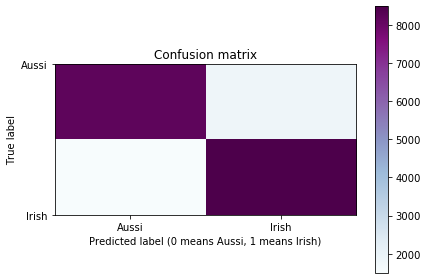

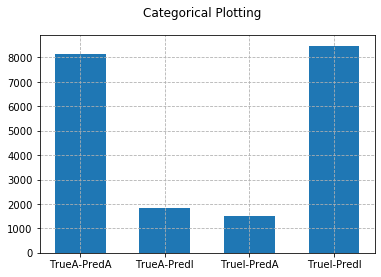

In [21]:
# output VALID's classification report / accuracy score / confusion matrix
y_valid_pred = clf.predict(X_valid_cleaned_vectors)
print(classification_report(y_valid, y_valid_pred))
print('-' * 88)
print('accuracy score is: %f' % accuracy_score(y_valid, y_valid_pred))
print('-' * 88)
valid_matrix = confusion_matrix(y_valid, y_valid_pred)
print(valid_matrix)
plot_confusion_matrix(valid_matrix, title='Confusion matrix', cmap=plt.cm.BuPu)
plot_categorical(valid_matrix, title='Categorical Plotting')

### Task #6

<u>Evaluate your model on the held out test set.</u>
                        
Which metric is most appropriate? Accuracy?

Is there anything else that could be useful to calculate? 

What is the classifier's baseline?

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     10023
           1       0.83      0.85      0.84      9977

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

----------------------------------------------------------------------------------------
accuracy score is: 0.839100
----------------------------------------------------------------------------------------
[[8264 1759]
 [1459 8518]]


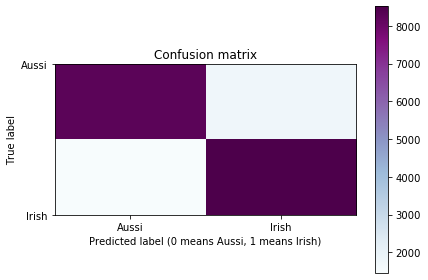

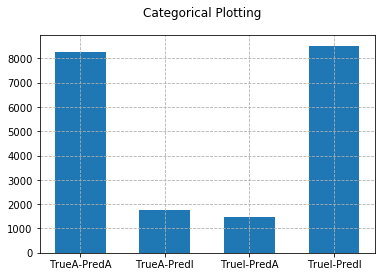

In [22]:
# output TEST's classification report / accuracy score / confusion matrix
y_test_pred = clf.predict(X_test_cleaned_vectors)
print(classification_report(y_test, y_test_pred))
print('-' * 88)
print('accuracy score is: %f' % accuracy_score(y_test, y_test_pred))
print('-' * 88)
test_matrix = confusion_matrix(y_test, y_test_pred)
print(test_matrix)
plot_confusion_matrix(test_matrix, title='Confusion matrix', cmap=plt.cm.BuPu)
plot_categorical(test_matrix, title='Categorical Plotting')

## Observations:-

After considerable times of trials, here is my report:
1. Among 3 Naive Bayes modules, when feeding with exactly same samples, __BernoulliNB > GaussianNB > MultinomialNB.__ 
It might because the __prior distribution__ for the datasets used here, are __closer to Bernoulli__ distribution.


2. Besides, I also find that:
After model is fixed, the __primary factor__ affecting model performance lies in "__max_features__" and "__min_df__" parameters in TfidfVectorizer. Basically, the __bigger for max_features__, the __higher accuracy score__. Also, the __smaller for min_df__, the __higher accuracy score__.


3. However, the __score-increasing-magnitude does NOT always keep the same pace of max_feature-increasing-magnitude__, which hints that there might be some __risk of over-fitting__ when max_feature goes too large. Therefore, we should be cautious when tuning max_features and min_df. 